In [ ]:
# Shortest Path: Dijkstra performance

In [1]:
immutable Arc
    from::Int
    to::Int
    cost::Int
end

In [2]:
adjL=[[Arc(1,2,5),Arc(1,3,2)],
    [Arc(2,5,3)],
    [Arc(3,2,2),Arc(3,6,4)],
    [Arc(4,5,1)],
    [Arc(5,6,3)],
    [Arc(6,4,1)]
]

6-element Array{Array{Arc,1},1}:
 Arc[Arc(1,2,5),Arc(1,3,2)]
 Arc[Arc(2,5,3)]           
 Arc[Arc(3,2,2),Arc(3,6,4)]
 Arc[Arc(4,5,1)]           
 Arc[Arc(5,6,3)]           
 Arc[Arc(6,4,1)]           

In [29]:
function simpleShortestPath(s,adjL)
    n=length(adjL) #O(1)
    pred=zeros(Int,n)  #O(n)
    S=Int[]    # O(1)
    S̄=[1:n...]  #O(n)
    d=ones(n)*typemax(Int) # Some big number  O(n)
    d[s]=0 #(O(1))
    while length(S)<n   # The loop will repeat n times
        i=S̄[indmin(d[S̄])] #O(n)
        push!(S,i) #O(1)
        deleteat!(S̄,findfirst(S̄.==i)) #If S is an array or list, this is O(n)
        for arc in adjL[i]
            j=arc.to
            new_d=d[i]+arc.cost
            if d[j]>new_d
                d[j]=new_d
                pred[j]=i
            end
        end
    end
    pred, d
end

simpleShortestPath (generic function with 1 method)

In [30]:
@time simpleShortestPath(1,adjL)

  0.089783 seconds (5.65 k allocations: 300.660 KB)


([0,3,1,6,2,3],[0.0,4.0,2.0,7.0,7.0,6.0])

Understanding the time complexity of push!

In [11]:
z=Int[]
maxSize=100_000
push_times=zeros(maxSize)
for i=1:maxSize
    push_times[i]=@elapsed push!(z,i)
end

INFO: Recompiling stale cache file /home/elbeltagy/.julia/lib/v0.5/PyPlot.ji for module PyPlot.


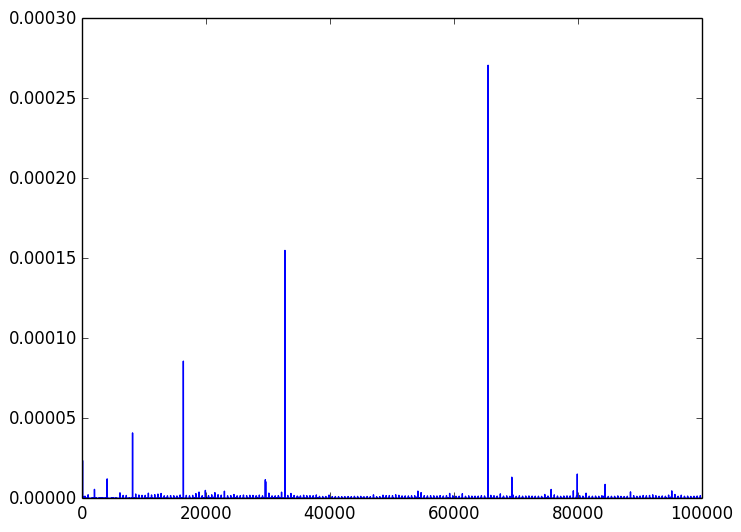

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f442518c550>

In [12]:
using PyPlot
plot(1:maxSize,push_times)

Time complexity of `deleteat!`

In [16]:
max_a_size=1000_000
del_times=zeros(round(Int,max_a_size/1000))
for i=1000:1000:max_a_size
    a=rand(i)
    del_times[round(Int,i/1000)]=@elapsed deleteat!(a,floor(Int,i/2))
end

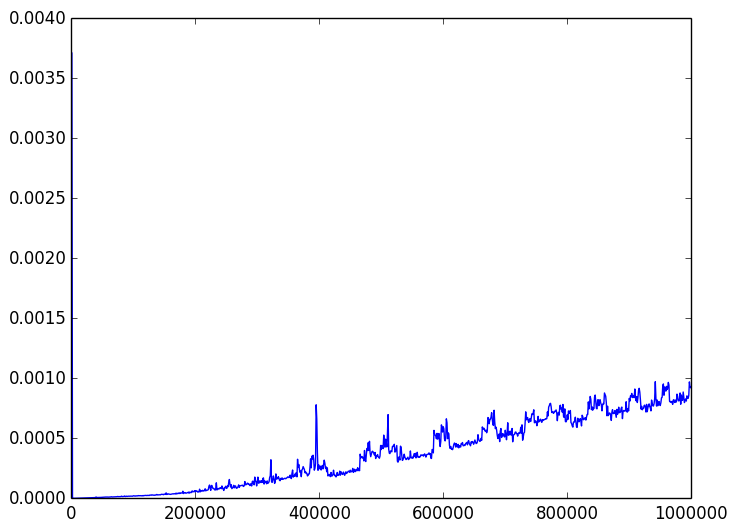

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f441f863a10>

In [19]:
plot(1000:1000:max_a_size,del_times)

Now we know the the above algorithm has a complexity of $O(n^2)$

Maybe will start by not improving he complxity, but by writing out own `findmin`.

In [21]:
function find_min(d,S̄)
    min_val=typemax(Int)
    best_indx=-1
    for i in S̄
        if (d[i]<min_val)
            min_val= d[i]
            best_indx=i
        end
    end
    best_indx
end

find_min (generic function with 1 method)

In [22]:
function simpleShortestPathFM(s,adjL)
    n=length(adjL) #O(1)
    pred=zeros(Int,n)  #O(n)
    S=Int[]    # O(1)
    S̄=[1:n...]  #O(n)
    d=ones(n)*typemax(Int) # Some big number  O(n)
    d[s]=0 #(O(1))
    while length(S)<n   # The loop will repeat n times
        i=find_min(d,S̄) #O(n)
        push!(S,i) #O(1)
        deleteat!(S̄,findfirst(S̄.==i)) #If S is an array or list, this is O(n)
        for arc in adjL[i]
            j=arc.to
            new_d=d[i]+arc.cost
            if d[j]>new_d
                d[j]=new_d
                pred[j]=i
            end
        end
    end
    pred, d
end

simpleShortestPathFM (generic function with 1 method)

In [25]:
@time simpleShortestPathFM(1,adjL)

  0.000129 seconds (108 allocations: 28.781 KB)


([0,3,1,6,2,3],[0.0,4.0,2.0,7.0,7.0,6.0])

In [33]:
@benchmark simpleShortestPathFM(1,adjL)

BenchmarkTools.Trial: 
  samples:          10000
  evals/sample:     1
  time tolerance:   5.00%
  memory tolerance: 1.00%
  memory estimate:  28.63 kb
  allocs estimate:  104
  minimum time:     31.33 μs (0.00% GC)
  median time:      35.77 μs (0.00% GC)
  mean time:        39.00 μs (7.07% GC)
  maximum time:     2.98 ms (95.31% GC)

In [34]:
@benchmark simpleShortestPath(1,adjL)

BenchmarkTools.Trial: 
  samples:          10000
  evals/sample:     1
  time tolerance:   5.00%
  memory tolerance: 1.00%
  memory estimate:  29.02 kb
  allocs estimate:  93
  minimum time:     31.41 μs (0.00% GC)
  median time:      36.15 μs (0.00% GC)
  mean time:        39.51 μs (7.70% GC)
  maximum time:     2.95 ms (94.76% GC)

adjL is too small to draw firm conclusions. However we expect the second code to be better for larger networks. 

Another improvement is use [priority queues](http://docs.julialang.org/en/release-0.5/stdlib/collections/#priorityqueue)